<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#HCPC:-Hierarchical-Clustering-on-Principal-Components" data-toc-modified-id="HCPC:-Hierarchical-Clustering-on-Principal-Components-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>HCPC: Hierarchical Clustering on Principal Components</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Why-HCPC?" data-toc-modified-id="Why-HCPC?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why HCPC?</a></span><ul class="toc-item"><li><span><a href="#Case-1:-Continuous-variables" data-toc-modified-id="Case-1:-Continuous-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Case 1: Continuous variables</a></span></li><li><span><a href="#Case-2:-Clustering-on-categorical-data" data-toc-modified-id="Case-2:-Clustering-on-categorical-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Case 2: Clustering on categorical data</a></span></li><li><span><a href="#Case-3:-Clustering-on-mixed-data" data-toc-modified-id="Case-3:-Clustering-on-mixed-data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Case 3: Clustering on mixed data</a></span></li></ul></li><li><span><a href="#Algorithm-of-the-HCPC-method" data-toc-modified-id="Algorithm-of-the-HCPC-method-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Algorithm of the HCPC method</a></span></li><li><span><a href="#Computation" data-toc-modified-id="Computation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Computation</a></span><ul class="toc-item"><li><span><a href="#R-packages" data-toc-modified-id="R-packages-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>R packages</a></span></li><li><span><a href="#R-function" data-toc-modified-id="R-function-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>R function</a></span></li><li><span><a href="#Case-of-continuous-variables" data-toc-modified-id="Case-of-continuous-variables-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Case of continuous variables</a></span></li><li><span><a href="#Case-of-categorical-variables" data-toc-modified-id="Case-of-categorical-variables-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Case of categorical variables</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## HCPC: Hierarchical Clustering on Principal Components

### Introduction
The HCPC (Hierarchical Clustering on Principal Components) approach allows us to combine the three standard methods used in multivariate data analyses (Husson et al.,
2010):
>1.Principal component methods (PCA, CA, MCA, FAMD, MFA),

>2.Hierarchical clustering and

>3.Partitioning clustering, particularly the k-means method.

### Why HCPC?

#### Case 1: Continuous variables

>In the situation where you have a multidimensional data set containing multiple con-
tinuous variables, the principal component analysis (PCA) can be used to reduce the
dimension of the data into few continuous variables containing the most important infor-
mation in the data. Next, you can perform cluster analysis on the PCA results.

>The PCA step can be considered as a denoising step which can lead to a more stable
clustering. This might be very useful if you have a large data set with multiple variables,
such as in gene expression data.

#### Case 2: Clustering on categorical data

>In order to perform clustering analysis on categorical data, the correspondence analysis
(CA, for analyzing contingency table) and the multiple correspondence analysis (MCA,
for analyzing multidimensional categorical variables) can be used to transform categorical
variables into a set of few continuous variables (the principal components). The cluster
analysis can be then applied on the (M)CA results.

>In this case, the (M)CA method can be considered as pre-processing steps which allow
to compute clustering on categorical data.

#### Case 3: Clustering on mixed data
>When you have a mixed data of continuous and categorical variables, you can first perform
FAMD (factor analysis of mixed data) or MFA (multiple factor analysis). Next, you can
apply cluster analysis on the FAMD/MFA outputs.

### Algorithm of the HCPC method

>The algorithm of the HCPC method, as implemented in the FactoMineR package, can be summarized as follow:

>1.Compute principal component methods

>2.Compute hierarchical clustering

>3.Choose the number of clusters based on the hierarchical tree

>4.Perform K-means clustering

### Computation

#### R packages

In [1]:
library(factoextra)
library(FactoMineR)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


#### R function

`HCPC(res, nb.clust = 0, min = 3, max = NULL, graph = TRUE)`
```
res: Either the result of a factor analysis or a data frame.

nb.clust: an integer specifying the number of clusters. Possible values are:

(1)0: the tree is cut at the level the user clicks on

(2)-1: the tree is automatically cut at the suggested level

(3)Any positive integer: the tree is cut with nb.clusters clusters

min, max: the minimum and the maximum number of clusters to be gener-
ated, respectively
• graph: if TRUE, graphics are displayed
```

#### Case of continuous variables

In [4]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [2]:
# Compute PCA with ncp = 3
res.pca <- PCA(USArrests, ncp = 3, graph = FALSE)
# Compute hierarchical clustering
res.hcpc <- HCPC(res.pca, graph = FALSE)

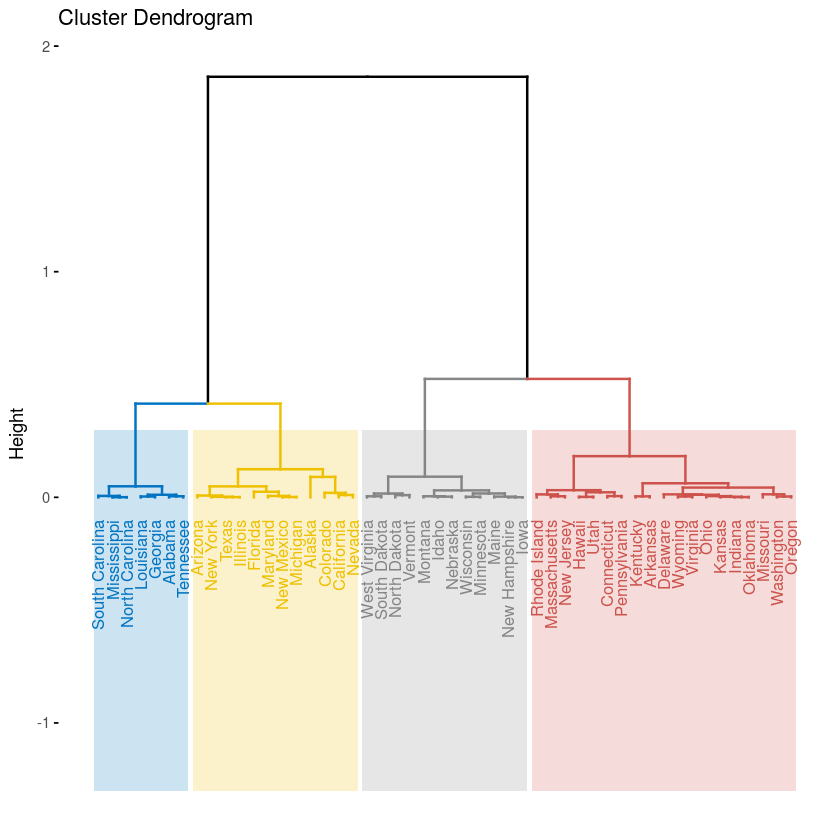

In [5]:
fviz_dend(res.hcpc,
         cex = 0.7,  # Label size
         palette = "jco",  # Color palette
         rect = TRUE, rect_fill = TRUE,  # Add rectangle around groups
         rect_border = "jco",  # Rectangle color
         labels_track_height = 0.8  # Augument of the room for labels
         )

The dendrogram suggests 4 clusters solution.

It’s possible to visualize individuals on the principal component map and to color individ-
uals according to the cluster they belong to. The function fviz_cluster() [in factoextra]
can be used to visualize individuals clusters.

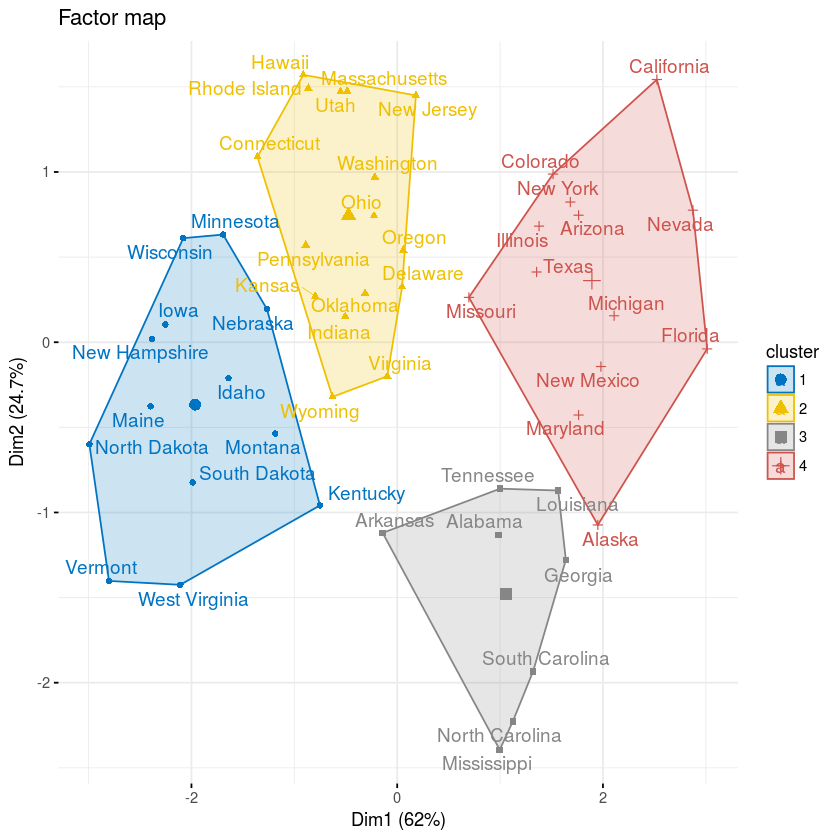

In [8]:
fviz_cluster(res.hcpc,
             repel = TRUE,  # Avoid label overlapping
             show.clust.cent = TRUE, # Show cluster centers
             palette = "jco",  # Color palette see ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
            )

You can also draw a three dimensional plot combining the hierarchical clustering and the
factorial map using the R base function plot():

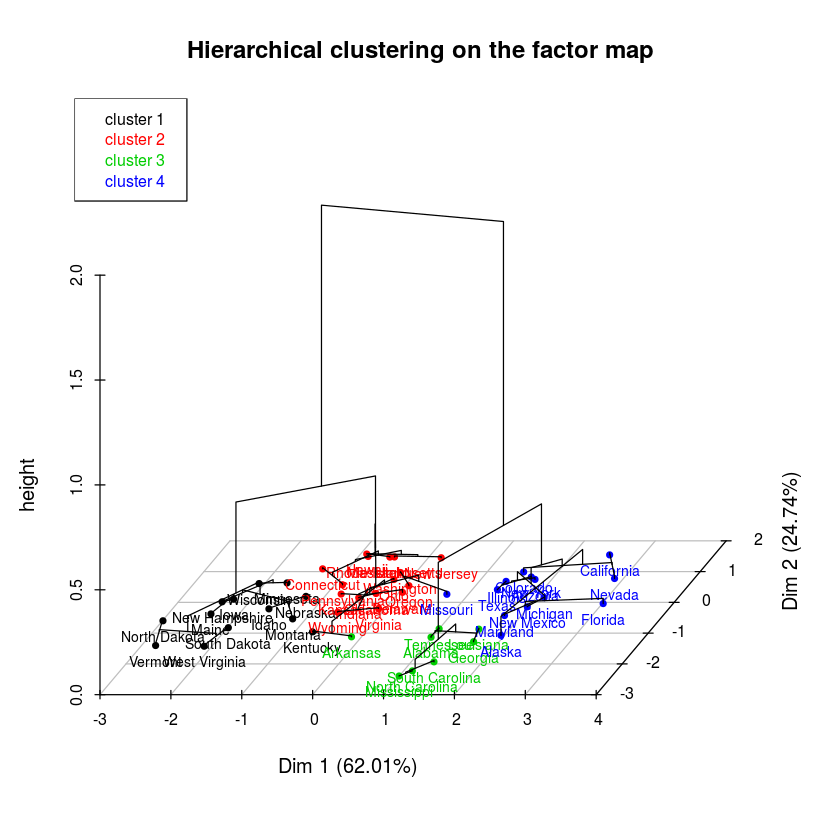

In [13]:
# Principal components + tree
plot(res.hcpc, choice = "3D.map")

In [14]:
# To display the original data with cluster assignments
head(res.hcpc$data.clust, 10)

,Murder,Assault,UrbanPop,Rape,clust
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,4
Colorado,7.9,204,78,38.7,4
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,4
Georgia,17.4,211,60,25.8,3


In [15]:
# To display quantitative variables that describe the most each cluster
res.hcpc$desc.var$quanti

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
UrbanPop,-3.898420,52.07692,65.540,9.691087,14.329285,9.682222e-05
Murder,-4.030171,3.60000,7.788,2.269870,4.311735,5.573624e-05
Rape,-4.052061,12.17692,21.232,3.130779,9.272248,5.076842e-05
Assault,-4.638172,78.53846,170.760,24.700095,82.500075,3.515038e-06
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
UrbanPop,2.793185,73.87500,65.540,8.652131,14.329285,0.005219187
Murder,-2.374121,5.65625,7.788,1.594902,4.311735,0.017590794
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Murder,4.357187,13.9375,7.788,2.433587,4.311735,1.317449e-05
Assault,2.698255,243.6250,170.760,46.540137,82.500075,6.970399e-03


In [16]:
res.hcpc$desc.axes$quanti

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.1,-5.175764,-1.964502,1.744438e-16,0.6192556,1.574878,2.269806e-07
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.2,3.585635,0.7428712,4.888451e-16,0.6137936,0.9948694,0.0003362596
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.1,2.058338,1.0610731,1.744438e-16,0.5146613,1.5748783,3.955769e-02
Dim.3,2.028887,0.3965588,1.217776e-16,0.3714503,0.5971291,4.246985e-02
Dim.2,-4.536594,-1.4773302,4.888451e-16,0.5750284,0.9948694,5.717010e-06
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.1,4.986474,1.892656,1.744438e-16,0.6126035,1.574878,6.149115e-07


In [17]:
# Finally, representative individuals of each cluster can be extracted as follow
res.hcpc$desc.ind$para

Cluster: 1
        Idaho  South Dakota         Maine          Iowa New Hampshire 
    0.3674381     0.4993032     0.5012072     0.5533105     0.5891145 
------------------------------------------------------------ 
Cluster: 2
        Ohio     Oklahoma Pennsylvania       Kansas      Indiana 
   0.2796100    0.5047549    0.5088363    0.6039091    0.7100820 
------------------------------------------------------------ 
Cluster: 3
       Alabama South Carolina        Georgia      Tennessee      Louisiana 
     0.3553460      0.5335189      0.6136865      0.8522640      0.8780872 
------------------------------------------------------------ 
Cluster: 4
  Michigan    Arizona New Mexico   Maryland      Texas 
 0.3246254  0.4532480  0.5176322  0.9013514  0.9239792 

#### Case of categorical variables

In [20]:
data(tea)
head(tea, 4)

breakfast,tea.time,evening,lunch,dinner,always,home,work,tearoom,friends,⋯,healthy,diuretic,friendliness,iron.absorption,feminine,sophisticated,slimming,exciting,relaxing,effect.on.health
breakfast,Not.tea time,Not.evening,Not.lunch,Not.dinner,Not.always,home,Not.work,Not.tearoom,Not.friends,⋯,healthy,Not.diuretic,Not.friendliness,Not.iron absorption,Not.feminine,Not.sophisticated,No.slimming,No.exciting,No.relaxing,No.effect on health
breakfast,Not.tea time,Not.evening,Not.lunch,Not.dinner,Not.always,home,Not.work,Not.tearoom,Not.friends,⋯,healthy,diuretic,Not.friendliness,Not.iron absorption,Not.feminine,Not.sophisticated,No.slimming,exciting,No.relaxing,No.effect on health
Not.breakfast,tea time,evening,Not.lunch,dinner,Not.always,home,work,Not.tearoom,friends,⋯,healthy,diuretic,friendliness,Not.iron absorption,Not.feminine,Not.sophisticated,No.slimming,No.exciting,relaxing,No.effect on health
Not.breakfast,Not.tea time,Not.evening,Not.lunch,dinner,Not.always,home,Not.work,Not.tearoom,Not.friends,⋯,healthy,Not.diuretic,Not.friendliness,Not.iron absorption,Not.feminine,sophisticated,No.slimming,No.exciting,relaxing,No.effect on health


In [21]:
# Performing MCA
res.mca <- MCA(tea,
        ncp = 20,             # Number of components kept
        quanti.sup = 19,      # Quantitative supplementary variables
        quali.sup = c(20:36), # Qualitative supplementary variables
        graph=FALSE
        )

In [22]:
res.hcpc <- HCPC (res.mca, graph = FALSE, max = 3)

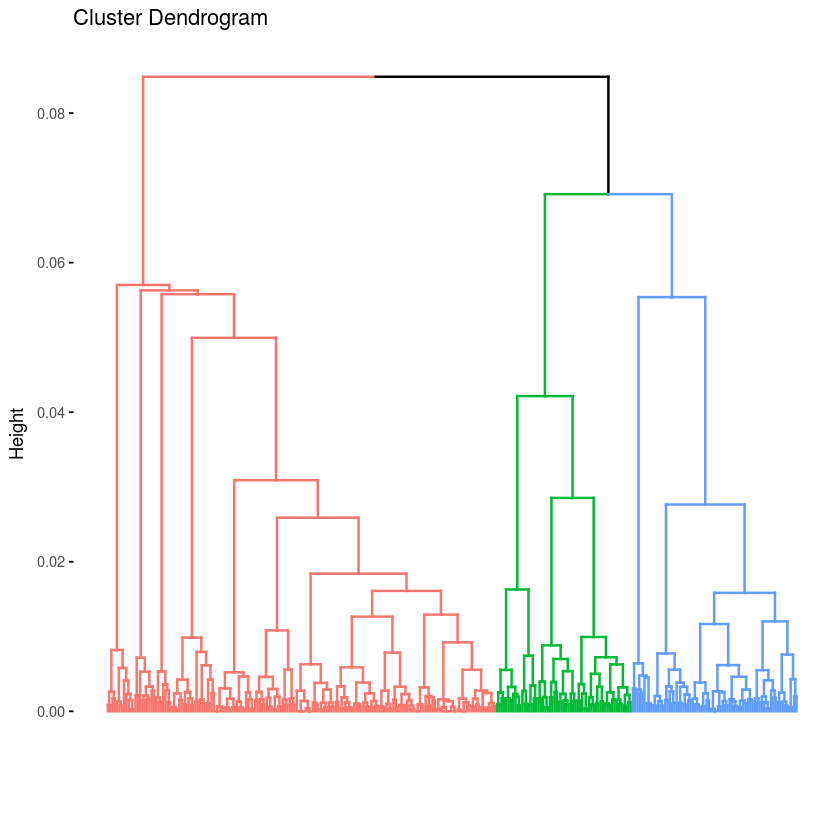

In [23]:
# Dendrogram
fviz_dend(res.hcpc, show_labels = FALSE)

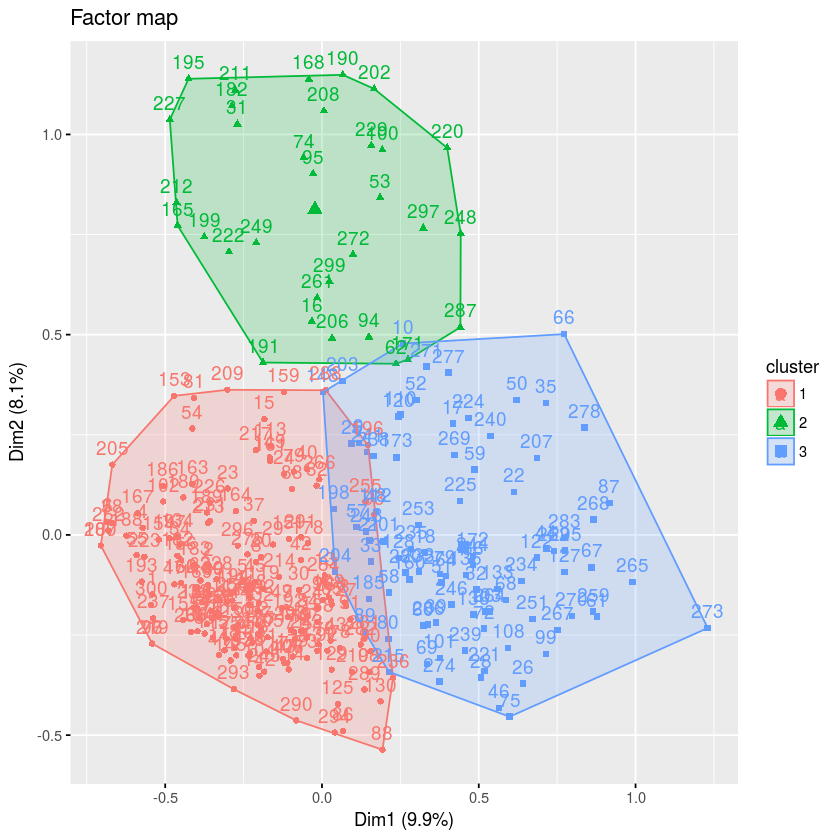

In [28]:
# Individuals factor map
fviz_cluster(res.hcpc, gemo = "point",
            main = "Factor map")

In [29]:
# Description by variables
res.hcpc$desc.var$test.chi2

,p.value,df
where,8.465616e-79,4
how,3.144675e-47,4
price,1.862462e-28,10
tearoom,9.624188e-19,2
pub,8.539893e-10,2
friends,6.137618e-08,2
resto,3.537876e-07,2
How,3.616532e-06,6
Tea,1.778330e-03,4
sex,1.789593e-03,2


In [30]:
# Description by variable categories
res.hcpc$desc.var$category

,Cla/Mod,Mod/Cla,Global,p.value,v.test
where=chain store,85.937500,93.750000,64.000000,2.094419e-40,13.307475
how=tea bag,84.117647,81.250000,56.666667,1.478564e-25,10.449142
tearoom=Not.tearoom,70.661157,97.159091,80.666667,1.082077e-18,8.826287
price=p_branded,83.157895,44.886364,31.666667,1.631861e-09,6.030764
pub=Not.pub,67.088608,90.340909,79.000000,1.249296e-08,5.692859
friends=Not.friends,76.923077,45.454545,34.666667,2.177180e-06,4.736242
resto=Not.resto,64.705882,81.250000,73.666667,4.546462e-04,3.506146
price=p_private label,90.476190,10.795455,7.000000,1.343844e-03,3.206448
tea.time=Not.tea time,67.938931,50.568182,43.666667,4.174032e-03,2.864701
How=alone,64.102564,71.022727,65.000000,9.868387e-03,2.580407


In [31]:
# Description by principal components
res.hcpc$desc.axes


Link between the cluster variable and the quantitative variables
             Eta2      P-value
Dim.2  0.66509105 2.828937e-71
Dim.1  0.63497903 1.009707e-65
Dim.4  0.11231020 2.073924e-08
Dim.14 0.03141943 8.732913e-03
Dim.6  0.02358138 2.890373e-02

Description of each cluster by quantitative variables
$`1`
          v.test Mean in category  Overall mean sd in category Overall sd
Dim.6   2.647552       0.03433626 -3.627957e-17      0.2655618  0.2671712
Dim.2  -7.796641      -0.13194656  1.294827e-17      0.1813156  0.3486355
Dim.1 -12.409741      -0.23196088  6.707597e-18      0.2143767  0.3850642
           p.value
Dim.6 8.107689e-03
Dim.2 6.357699e-15
Dim.1 2.314001e-35

$`2`
          v.test Mean in category  Overall mean sd in category Overall sd
Dim.2  13.918285       0.81210870  1.294827e-17      0.2340345  0.3486355
Dim.4   4.350620       0.20342610  2.600640e-18      0.3700048  0.2793822
Dim.14  2.909073       0.10749165 -2.109424e-17      0.2161509  0.2207818
Dim.13  2.3415

In [32]:
# Description by Individuals
res.hcpc$desc.ind$para

Cluster: 1
      285       152       166       143        71 
0.5884476 0.6242123 0.6242123 0.6244176 0.6478185 
------------------------------------------------------------ 
Cluster: 2
       31        95        53       182       202 
0.6620553 0.7442013 0.7610437 0.7948663 0.8154826 
------------------------------------------------------------ 
Cluster: 3
      172        33       233        18        67 
0.7380497 0.7407711 0.7503006 0.7572188 0.7701598 

### Summary


We described how to compute hierarchical clustering on principal components (HCPC).
This approach is useful in situations, including:

>• When you have a large data set containing continuous variables, a principal component analysis can be used to reduce the dimension of the data before the hierarchical clustering analysis.

>• When you have a data set containing categorical variables, a (Multiple)Correspondence
analysis can be used to transform the categorical variables into few continuous
principal components, which can be used as the input of the cluster analysis.

We used the FactoMineR package to compute the HCPC and the factoextra R package
for ggplot2-based elegant data visualization.
